<a href="https://colab.research.google.com/github/tallywiesenberg/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Wiesenberg_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
sales =  [3505, 2400, 3027, 2798, 3700, 3250, 2689]
def sqrt(n):
  #calculate square root of value
  if n >= 0:
    value = n**0.5
    return value
  else:  
    print('Error: Complex Output')
value = sqrt(2)
print(value)

def mean_std_variance(numlist):
  #calculate mean, standard dev,  and variance for list of numbers
  mean = sum(numlist) / len(numlist)
  distance_squared = [(n - mean)**2 for n in numlist]
  variance = sum(distance_squared) / (len(numlist)-1)
  std = sqrt(variance)
  return mean, std, variance
mean, std, variance = mean_std_variance(sales)
print(mean, std, variance)

1.4142135623730951
3052.714285714286 463.0204150595357 214387.90476190473


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [41]:
data = np.array([[127, 80, 105, 92, 120, 115, 93], #customers
                 [3505, 2400, 3027, 2798, 3700, 3250, 2689]]) #sales  
np.cov(data)

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
mean, std_cust, variance = mean_std_variance(data[0]) #customers
mean, std_sales, variance = mean_std_variance(data[1]) # sales

In [43]:
print(std_cust) #customers
print(std_sales) #sales

17.057326313123664
463.0204150595357


In [0]:
corr1 = np.cov(data)[0, 1]/(std_cust * std_sales)

In [0]:
corr2 = np.corrcoef(data)

In [46]:
print(corr1, corr2)
corr1 == corr2

0.9628339778148909 [[1.         0.96283398]
 [0.96283398 1.        ]]


array([[False,  True],
       [ True, False]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [47]:
#read csv
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
print(df.shape)
df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [48]:
#correlation matrix
df.corr().style.background_gradient(cmap = 'coolwarm').set_precision(2)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1,0.9,-0.29,-0.3,0.066,0.0036,-0.48,0.016,-0.6
pclass,0.9,1,-0.31,-0.37,0.061,0.018,-0.56,-0.035,-0.71
survived,-0.29,-0.31,1,-0.05,-0.028,0.083,0.24,nan,0.3
age,-0.3,-0.37,-0.05,1,-0.19,-0.13,0.17,0.059,0.27
sibsp,0.066,0.061,-0.028,-0.19,1,0.37,0.16,-0.1,-0.0091
parch,0.0036,0.018,0.083,-0.13,0.37,1,0.22,0.051,0.037
fare,-0.48,-0.56,0.24,0.17,0.16,0.22,1,-0.043,0.51
body,0.016,-0.035,nan,0.059,-0.1,0.051,-0.043,1,0.084
has_cabin_number,-0.6,-0.71,0.3,0.27,-0.0091,0.037,0.51,0.084,1


In [49]:
#covariance matrix
df.cov().style.background_gradient(cmap = 'coolwarm')

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143118,284.357,-53.9671,-1442.94,25.8287,1.17278,-9410.74,591.579,-95.4389
pclass,284.357,0.701969,-0.127248,-3.9546,0.0530905,0.0132872,-24.2278,-2.87665,-0.249992
survived,-53.9671,-0.127248,0.23625,-0.314343,-0.014088,0.0347757,6.14602,0,0.0614056
age,-1442.94,-3.9546,-0.314343,165.85,-2.55981,-1.45938,114.417,81.6229,1.46314
sibsp,25.8287,0.0530905,-0.014088,-2.55981,1.08505,0.336833,8.64177,-8.70847,-0.00394645
parch,1.17278,0.0132872,0.0347757,-1.45938,0.336833,0.749195,9.92803,4.23719,0.0133158
fare,-9410.74,-24.2278,6.14602,114.417,8.64177,9.92803,2678.96,-179.165,10.977
body,591.579,-2.87665,0,81.6229,-8.70847,4.23719,-179.165,9544.69,3.62569
has_cabin_number,-95.4389,-0.249992,0.0614056,1.46314,-0.00394645,0.0133158,10.977,3.62569,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
def plt_vector(x=1, y=1, z=0):
  #plot vector of 2 or 3 dimensions
  if z == 0:
    #append array
    vector = np.array([[0, 0, x, y]])
    #separate origin from vectors
    plt.arrow(0, 0, x, y, head_width = 0.02, head_length = 0.01)
  else:
    #append array
    vector = np.array([[0, 0 , 0, x, y, z]])
    #separate origin from vectors
    X, Y, Z, U, V, W = zip(*vector)
    #plot 3d axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #plot vector
    ax.quiver(X, Y, Z, U, V, W, length=1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z') 
  return vector

array([[ 0.  ,  0.  , -0.25,  0.25]])

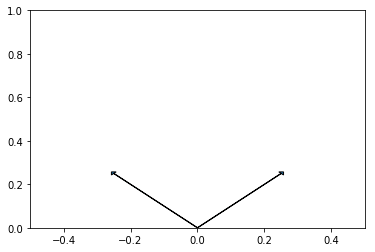

In [51]:
fig, ax = plt.subplots()
ax.set_xlim([-0.5, 0.5])
plt_vector(x=0.25, y=0.25)
plt_vector(x=-0.25, y =0.25)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [52]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
if np.dot(a, b) == 0:
  print('a and b are Orthogonal')
else:
  print('Not orthogonal')

Not orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([[2, 15, 6, 20]])

In [54]:
np.linalg.norm(c)**2

665.0

In [55]:
np.dot(c, c.T)

array([[665]])

The dot product of vector c onto itself is not calculable because the dimensions do not match for multiplication.


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [0]:
d = np.array([7, 12])
e = np.array([2, 11, -8])

In [0]:
d_hat = d/np.linalg.norm(d)
e_hat = e/np.linalg.norm(e)

In [58]:
print(np.linalg.norm(d))
print(np.linalg.norm(e))

13.892443989449804
13.74772708486752


In [59]:
print(d_hat)
print(e_hat)

[0.50387103 0.8637789 ]
[ 0.14547859  0.80013226 -0.58191437]


\begin{align}
d = 13.89244 \begin{bmatrix} 0.50387103 \\ 0.8637789 \end{bmatrix}
\qquad
e = 17.74772 \begin{bmatrix} 0.14547859 \\ 0.80013226 \\ -0.58191437  \end{bmatrix}
\end{align}Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([[4, 12, 11, 9, 2]])
f_hat = f/np.linalg.norm(f)

In [61]:
f_hat

array([[0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167]])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
def plt_vector(x=1, y=1, z=0):
  #plot vector of 2 or 3 dimensions
  if z == 0:
    #append array
    vector = np.array([[0, 0, x, y]])
    #separate origin from vectors
    plt.arrow(0, 0, x, y, head_width = 0.02, head_length = 0.01)
  else:
    #append array
    vector = np.array([[0, 0 , 0, x, y, z]])
    #separate origin from vectors
    X, Y, Z, U, V, W = zip(*vector)
    #plot 3d axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #plot vector
    ax.quiver(X, Y, Z, U, V, W, length=1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z') 
  return vector

array([[0. , 0. , 0.7, 0.6]])

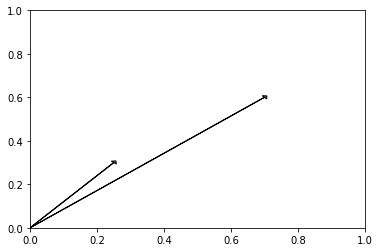

In [63]:
#independent
plt.subplot()
plt_vector(0.25, 0.3)
plt_vector(0.7, 0.6)

array([[0. , 0. , 0.5, 0.5]])

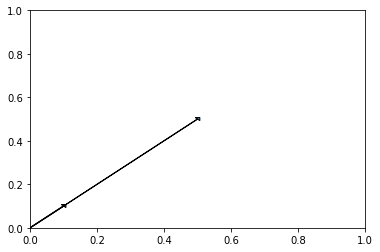

In [64]:
# dependent
plt.subplot()
plt_vector(0.1, 0.1)
plt_vector(0.5, 0.5)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([[1, 2]])
h = np.array([[4, 8]])

The span of these two vectors is a line along vectors g and h, because the two vectors are linearly dependent.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

R^3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



array([[0, 0, 0, 1]])

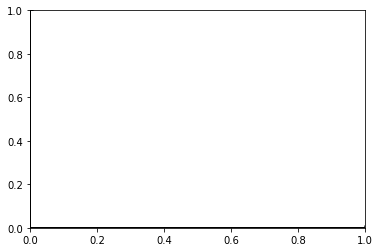

In [66]:
plt.subplot()
plt_vector(1, 0)
plt_vector(0, 1)

## 6.2 What does it mean to form a basis?

Forming a basis means assembling a group of vectors that, when multiplied as one matrix by a vector, will constitute the entirety of the vector space of the given dimension. They need to be linearly independent in order for them to match their rank.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [67]:
3

3

## 7.2 What does the rank of a matrix tell us?

Rank tells us the number of dimensions the matrix exists in.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([[1, 3]])
w = np.array([[-1, 2]])

In [0]:
project

In [89]:
proj_L = (np.dot(w, v.T)/np.dot(v, v.T))*v
proj_L

array([[0.5, 1.5]])

In [72]:
w[0, 1]

2

[(-1, 5), (-1, 5)]

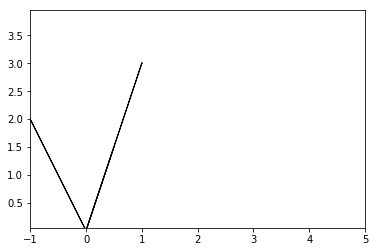

In [88]:
fig, ax = plt.subplots()
plt_vector(w[0, 0], w[0, 1])
plt_vector(v[0, 0], v[0, 1])
plt_vector(proj_L[0, 0], proj_L[0, 1])
ax.axis('equal')
ax.set(xlim=(-1, 5), ylim=(-1,5))

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()